Dataset loaded successfully.
Initial shape: (411804, 10)

Initial DataFrame Info (from covid_project_dataset.csv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411804 entries, 0 to 411803
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              411804 non-null  object 
 1   country           411804 non-null  object 
 2   total_cases       411804 non-null  float64
 3   new_cases         411804 non-null  float64
 4   total_deaths      411804 non-null  float64
 5   new_deaths        411804 non-null  float64
 6   total_recoveries  411804 non-null  int64  
 7   new_recoveries    411804 non-null  int64  
 8   active_cases      411804 non-null  float64
 9   population        411804 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 31.4+ MB

Initial DataFrame Head (from covid_project_dataset.csv):
         date      country  total_cases  new_cases  total_deaths  new_deaths 

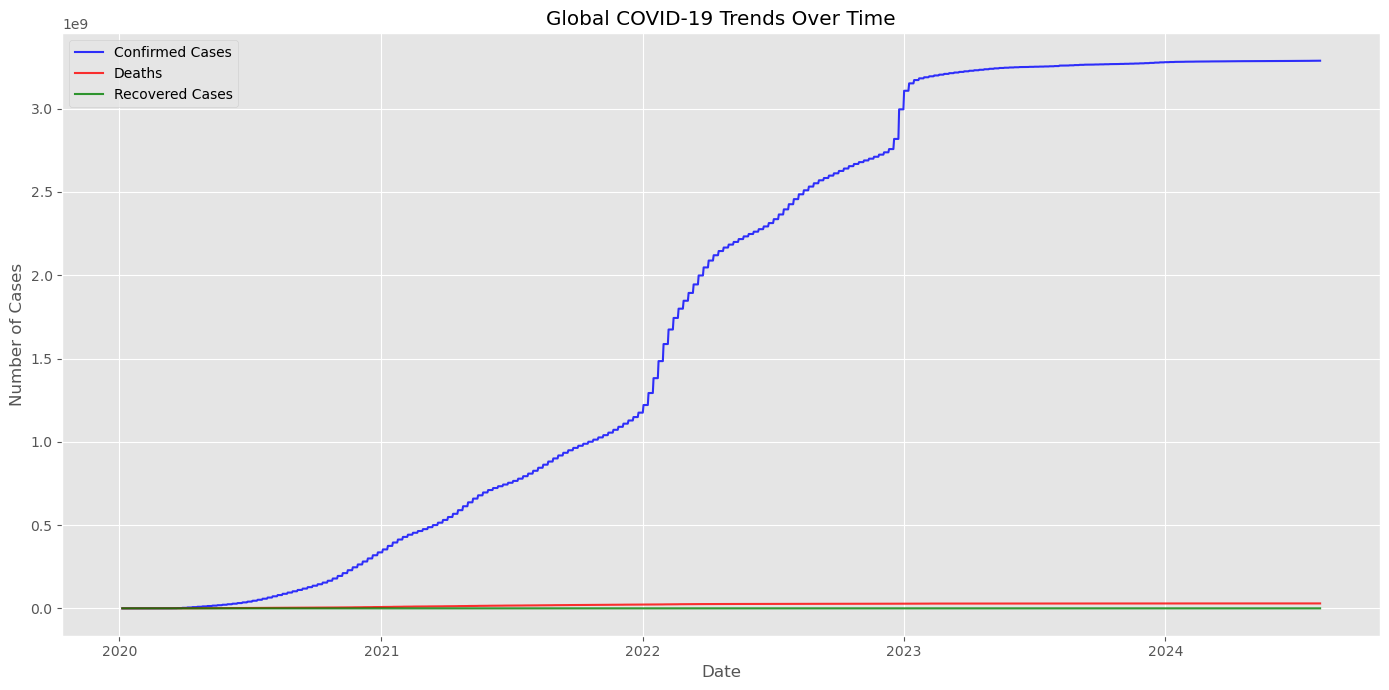

Generated: global_trends_line_plot.png


C:\Users\Ayanti\AppData\Local\Temp\ipykernel_14556\4040551871.py:138: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_latest_country['Infection_Rate_Per_100k'].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\Ayanti\AppData\Local\Temp\ipykernel_14556\4040551871.py:140: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

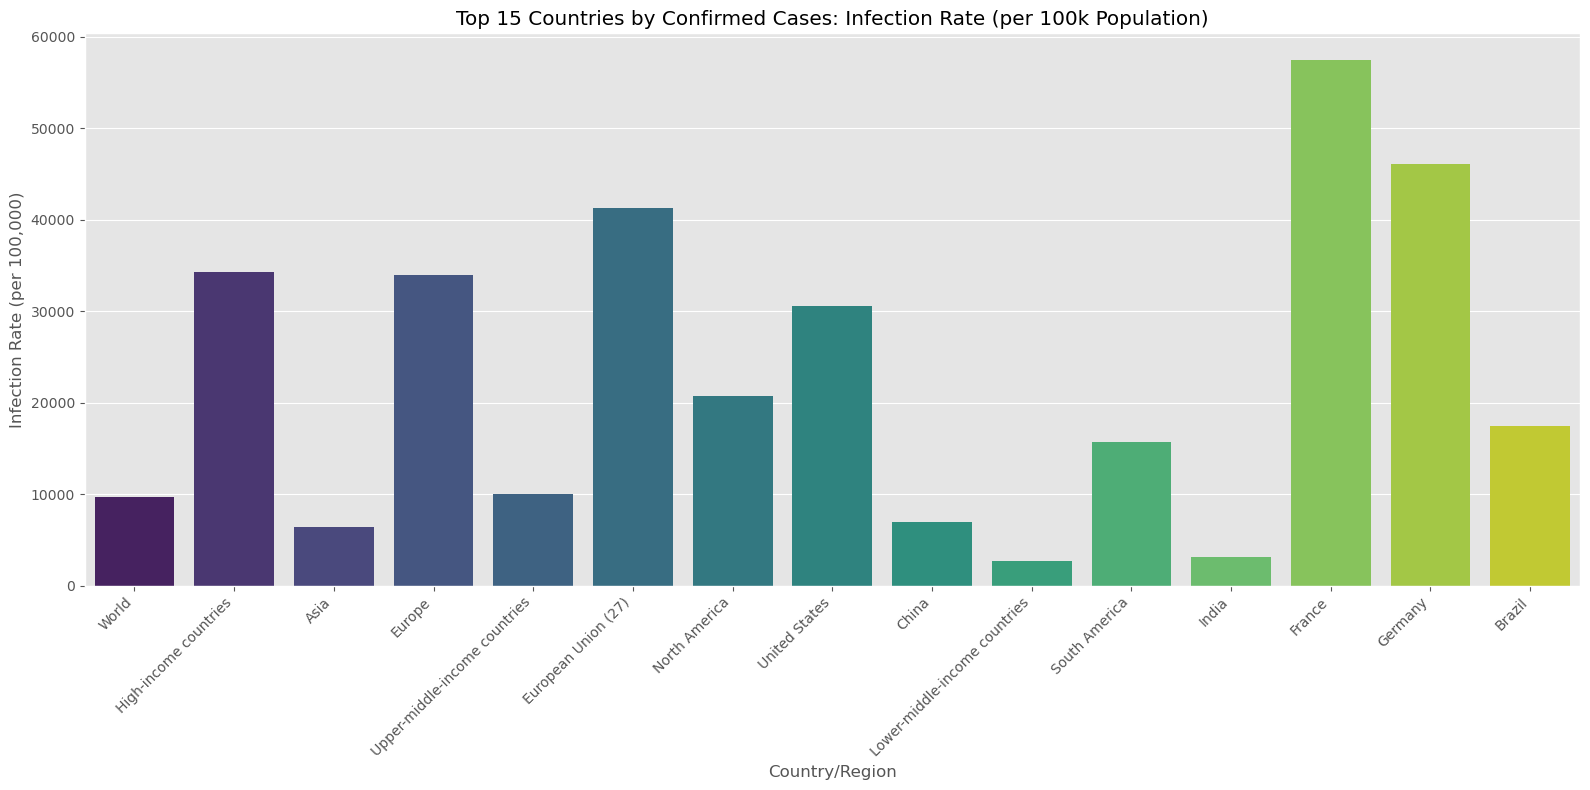

Generated: top_countries_infection_rate_bar_chart.png


C:\Users\Ayanti\AppData\Local\Temp\ipykernel_14556\4040551871.py:171: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country/Region', y='Recovery_Rate', data=df_for_recovery_plot, palette='plasma')


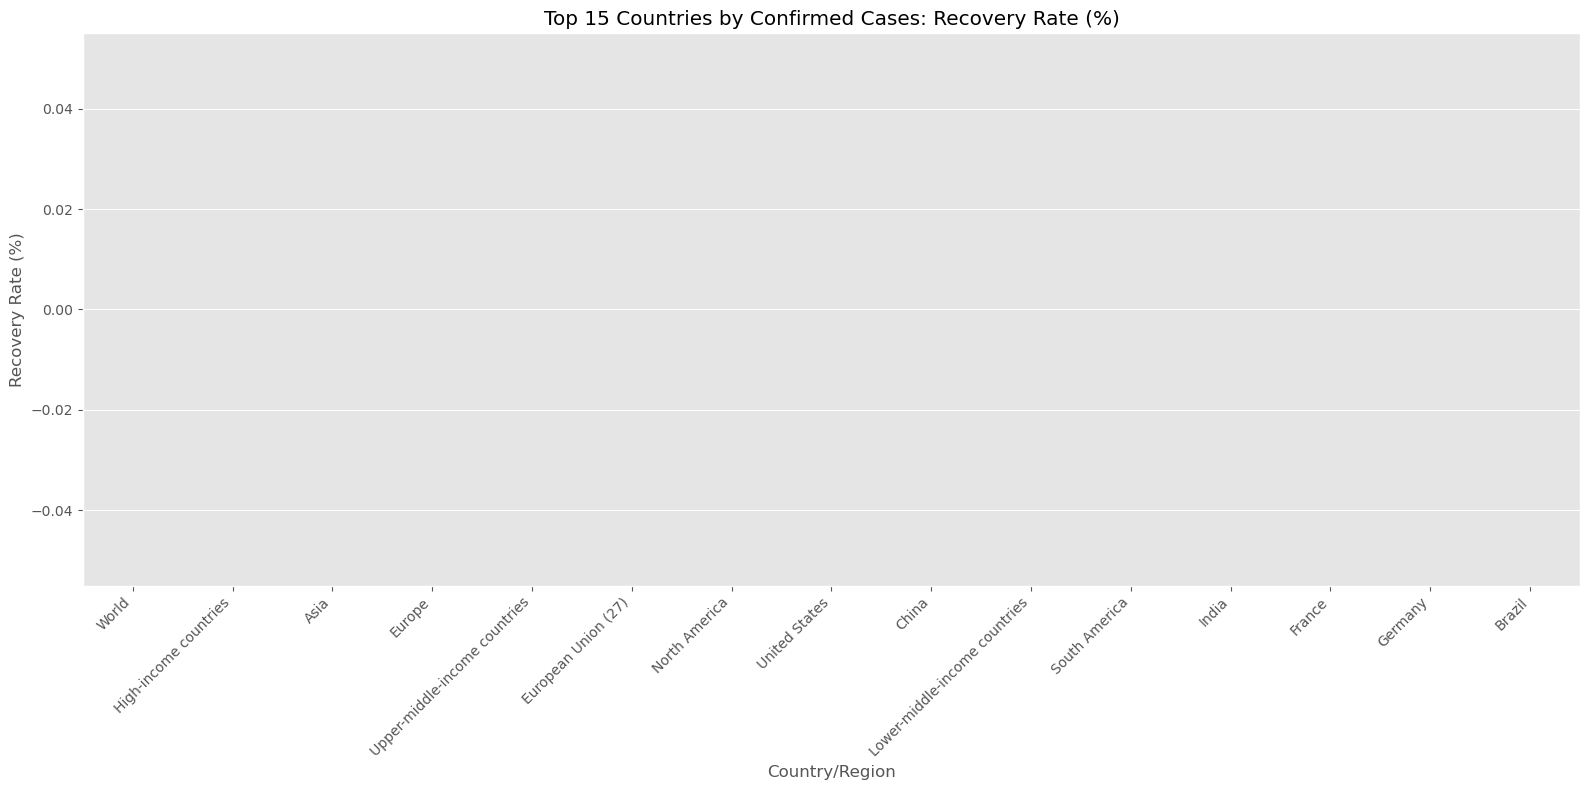

Generated: top_countries_recovery_rate_bar_chart.png


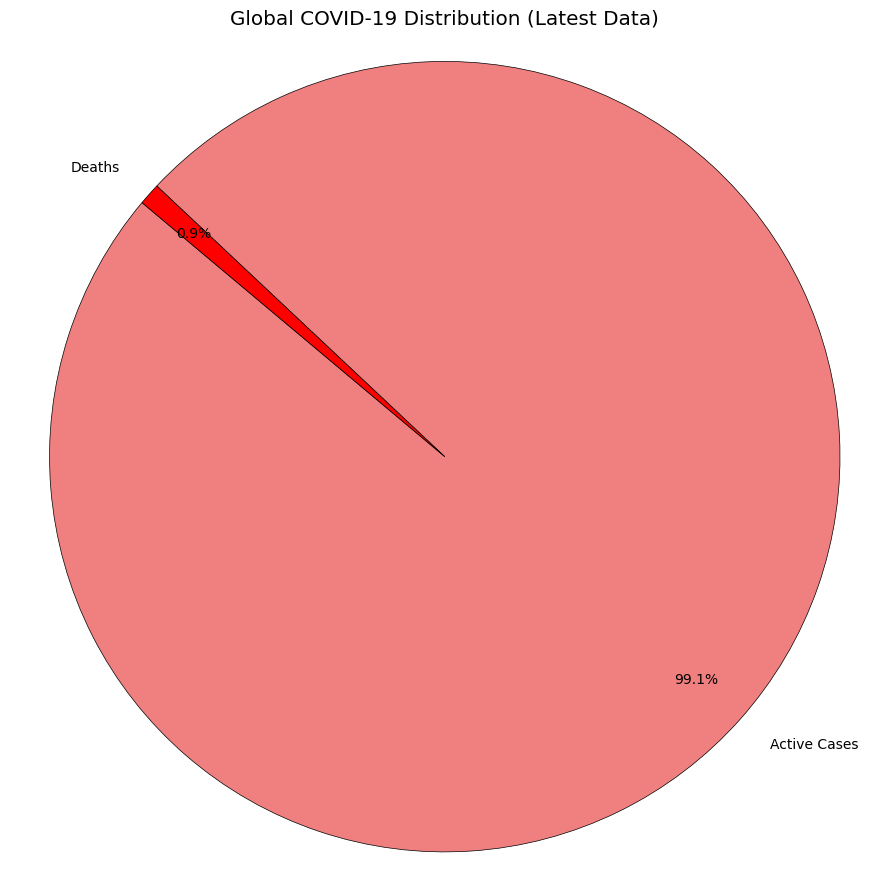

Generated: global_distribution_pie_chart.png


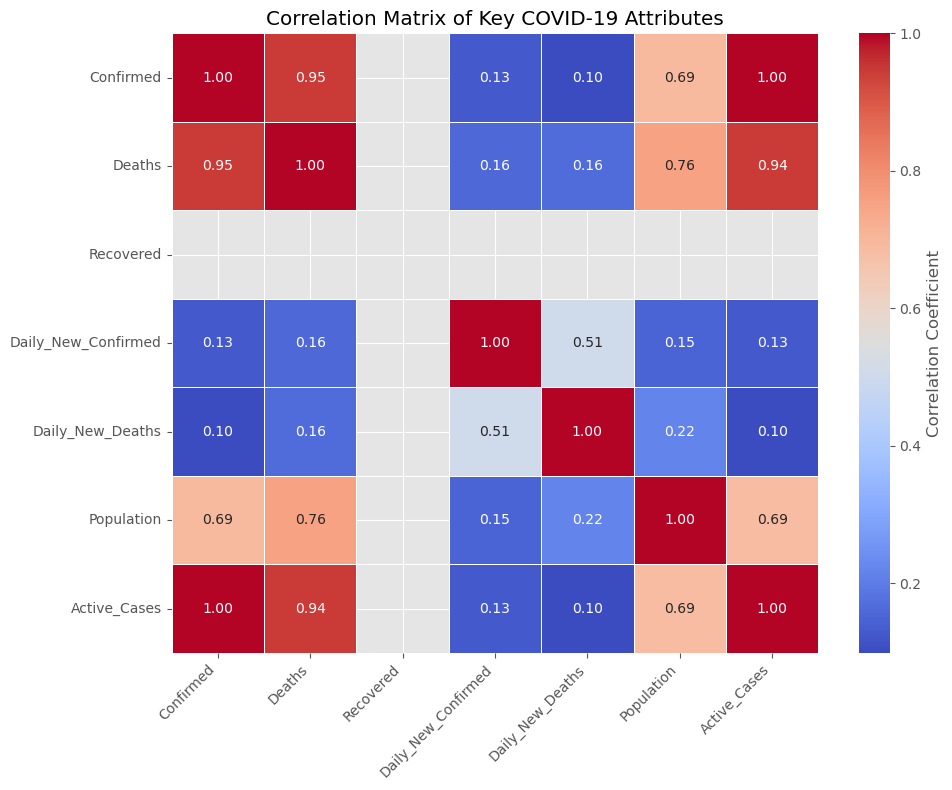

Generated: correlation_heatmap.png


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for better plot aesthetics
plt.style.use('ggplot')

# Define the file path for the uploaded CSV
file_path = 'covid_project_dataset.csv'

# --- Section 1 & 2 (Re-evaluated for Section 3's needs): Data Loading, Cleaning, and Pre-processing ---
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    print(f"Initial shape: {df.shape}")
except FileNotFoundError:
    print(f"Error: '{file_path}' not found. Please ensure the CSV file is in the correct directory.")
    exit() # Exit if file not found

# Display initial info and head to understand column names
print("\nInitial DataFrame Info (from covid_project_dataset.csv):")
df.info()
print("\nInitial DataFrame Head (from covid_project_dataset.csv):")
print(df.head())
print("\nActual columns in the DataFrame:", df.columns.tolist())

# Standardize column names for consistency with the project brief
# CORRECTED column_mapping based on actual file's column names
column_mapping = {
    'country': 'Country/Region',  # Corrected from 'location' to 'country'
    'date': 'Date',
    'total_cases': 'Confirmed',
    'total_deaths': 'Deaths',
    'total_recoveries': 'Recovered', # This column is present in covid_project_dataset.csv
    'population': 'Population', # This column is present in covid_project_dataset.csv
    'new_cases': 'Daily_New_Confirmed',
    'new_deaths': 'Daily_New_Deaths',
    'active_cases': 'Active_Cases' # This column is present, might be useful for pie chart
}

# Apply renaming only if the original column exists
actual_renames = {}
for old_name, new_name in column_mapping.items():
    if old_name in df.columns:
        actual_renames[old_name] = new_name
    else:
        print(f"Warning: Original column '{old_name}' not found in the dataset.")

df.rename(columns=actual_renames, inplace=True)

# Post-rename check for existence of critical columns
required_for_basic_processing = ['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Population']
for col in required_for_basic_processing:
    if col not in df.columns:
        print(f"\nError: Critical column '{col}' is missing after attempted renaming. Cannot proceed.")
        print("Please ensure your CSV contains 'date', 'country', 'total_cases', 'total_deaths', 'total_recoveries', 'population' columns or similar, and adjust the 'column_mapping' accordingly.")
        exit()

# Ensure 'Date' column is datetime
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df.dropna(subset=['Date'], inplace=True) # Drop rows where date conversion failed
    print("\nConverted 'Date' column to datetime.")

# Fill missing numerical values with 0 for key columns used in visualization
# Using the NEW names (e.g., 'Confirmed', 'Deaths')
for col in ['Confirmed', 'Deaths', 'Recovered', 'Daily_New_Confirmed', 'Daily_New_Deaths', 'Population', 'Active_Cases']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
    else:
        # These are crucial, if missing after rename, it's an issue with column mapping or file.
        print(f"Critical numerical column '{col}' is missing after renaming. This might affect calculations.")
        # For now, if missing and crucial, it implies an issue; let's allow it to proceed with warning if possible
        # but the above `required_for_basic_processing` check already covers primary ones.


# Remove duplicates based on Date and Country/Region
initial_rows = df.shape[0]
# Use the new names for subset
df.drop_duplicates(subset=['Date', 'Country/Region'], inplace=True)
rows_after_duplicates = df.shape[0]
if initial_rows > rows_after_duplicates:
    print(f"Removed {initial_rows - rows_after_duplicates} duplicate rows based on 'Date' and 'Country/Region'.")
else:
    print("No duplicate rows found based on 'Date' and 'Country/Region'.")

# Sort data for correct time-series operations
df.sort_values(by=['Country/Region', 'Date'], inplace=True)

print(f"\nDataFrame shape after initial cleaning and preprocessing: {df.shape}")
print("\nDataFrame Head after initial cleaning and preprocessing:")
print(df.head())

# --- Section 3: Data Visualization ---
print("\n--- Starting Section 3: Data Visualization ---")

if not df.empty:
    # 1. Create line plots to show the trend of COVID-19 cases over time.
    # Global trend for Confirmed, Deaths, Recovered (summing across all countries for each date)
    # The 'country' column in this dataset likely contains actual countries only.
    # If there were aggregates like 'World', 'Europe', etc., we would filter them.
    # Based on the head, it seems to be actual countries like 'Afghanistan'.

    df_global_daily = df.groupby('Date').agg(
        Global_Confirmed=('Confirmed', 'sum'),
        Global_Deaths=('Deaths', 'sum'),
        Global_Recovered=('Recovered', 'sum')
    ).reset_index()

    plt.figure(figsize=(14, 7))
    plt.plot(df_global_daily['Date'], df_global_daily['Global_Confirmed'], label='Confirmed Cases', color='blue', alpha=0.8)
    plt.plot(df_global_daily['Date'], df_global_daily['Global_Deaths'], label='Deaths', color='red', alpha=0.8)
    plt.plot(df_global_daily['Date'], df_global_daily['Global_Recovered'], label='Recovered Cases', color='green', alpha=0.8)
    plt.title('Global COVID-19 Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('global_trends_line_plot.png')
    plt.show()
    print("Generated: global_trends_line_plot.png")


    # 2. Design bar charts to compare infection and recovery rates among different countries.
    # Get the latest data for each country. Use 'max' on numerical columns for latest cumulative figures.
    df_latest_country = df.groupby('Country/Region').agg(
        Latest_Confirmed=('Confirmed', 'max'),
        Latest_Deaths=('Deaths', 'max'),
        Latest_Recovered=('Recovered', 'max'),
        Latest_Population=('Population', 'max')
    ).reset_index()

    # Calculate Infection Rate (Confirmed Cases per 100,000 population)
    # Handle division by zero for population.
    df_latest_country['Infection_Rate_Per_100k'] = (df_latest_country['Latest_Confirmed'] / df_latest_country['Latest_Population']) * 100000
    df_latest_country['Infection_Rate_Per_100k'].replace([np.inf, -np.inf], np.nan, inplace=True)
    # Fill NaN from division by zero in 'Infection_Rate_Per_100k' to 0, particularly if population was 0
    df_latest_country['Infection_Rate_Per_100k'].fillna(0, inplace=True)


    # Calculate Recovery Rate (Recovered / Confirmed * 100)
    # Handle division by zero for confirmed cases.
    df_latest_country['Recovery_Rate'] = (df_latest_country['Latest_Recovered'] / df_latest_country['Latest_Confirmed']) * 100
    df_latest_country['Recovery_Rate'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df_latest_country['Recovery_Rate'].fillna(0, inplace=True)

    # Select top N countries for visualization based on confirmed cases
    top_n = 15 # Number of countries to show
    # Filter out any rows where Latest_Confirmed might be 0, before ranking
    top_countries_by_confirmed = df_latest_country[df_latest_country['Latest_Confirmed'] > 0].nlargest(top_n, 'Latest_Confirmed')

    # Bar chart for Infection Rate
    plt.figure(figsize=(16, 8))
    sns.barplot(x='Country/Region', y='Infection_Rate_Per_100k', data=top_countries_by_confirmed, palette='viridis')
    plt.title(f'Top {top_n} Countries by Confirmed Cases: Infection Rate (per 100k Population)')
    plt.xlabel('Country/Region')
    plt.ylabel('Infection Rate (per 100,000)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('top_countries_infection_rate_bar_chart.png')
    plt.show()
    print("Generated: top_countries_infection_rate_bar_chart.png")

    # Bar chart for Recovery Rate
    # Ensure there are confirmed cases for recovery rate calculation
    df_for_recovery_plot = top_countries_by_confirmed[top_countries_by_confirmed['Latest_Confirmed'] > 0]
    if not df_for_recovery_plot.empty:
        plt.figure(figsize=(16, 8))
        sns.barplot(x='Country/Region', y='Recovery_Rate', data=df_for_recovery_plot, palette='plasma')
        plt.title(f'Top {top_n} Countries by Confirmed Cases: Recovery Rate (%)')
        plt.xlabel('Country/Region')
        plt.ylabel('Recovery Rate (%)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig('top_countries_recovery_rate_bar_chart.png')
        plt.show()
        print("Generated: top_countries_recovery_rate_bar_chart.png")
    else:
        print("Not enough data to plot Recovery Rate for top countries.")


    # 3. Plot pie charts to represent the percentage of infections, recoveries, and deaths globally.
    # Use the latest global totals from df_global_daily (last row)
    if not df_global_daily.empty:
        global_latest = df_global_daily.iloc[-1]

        total_global_confirmed = global_latest['Global_Confirmed']
        total_global_deaths = global_latest['Global_Deaths']
        total_global_recovered = global_latest['Global_Recovered']

        # Calculate Active cases: Confirmed - Deaths - Recovered
        # This dataset explicitly has 'active_cases' so let's use that for clarity,
        # but we also need to ensure it's not negative and sums up correctly.
        # If 'active_cases' column was mapped, use df_latest_country['Latest_Active_Cases']
        # For global, we sum 'active_cases' directly from the daily global dataframe or use
        # calculated global_active_cases if the 'Active_Cases' column was reliable.
        # Let's sum from the cleaned daily data for the latest date.
        global_active_cases_from_df = df[df['Date'] == df['Date'].max()]['Active_Cases'].sum()

        labels = []
        sizes = []
        colors = []

        if global_active_cases_from_df > 0:
            labels.append('Active Cases')
            sizes.append(global_active_cases_from_df)
            colors.append('lightcoral')
        
        if total_global_deaths > 0:
            labels.append('Deaths')
            sizes.append(total_global_deaths)
            colors.append('red')
        
        if total_global_recovered > 0:
            labels.append('Recovered')
            sizes.append(total_global_recovered)
            colors.append('lightgreen')

        # If no positive slices after all checks, fall back to simple Confirmed vs Deaths
        if not sizes and total_global_confirmed > 0 and total_global_deaths > 0:
            labels = ['Confirmed', 'Deaths']
            sizes = [total_global_confirmed, total_global_deaths]
            colors = ['skyblue', 'red']
            print("Falling back to simplified pie chart: Confirmed vs. Deaths.")

        if sum(sizes) > 0:
            plt.figure(figsize=(9, 9))
            plt.pie(sizes, labels=labels, colors=colors[:len(labels)],
                    autopct='%1.1f%%', startangle=140, pctdistance=0.85,
                    wedgeprops={'edgecolor': 'black'})
            plt.title('Global COVID-19 Distribution (Latest Data)')
            plt.axis('equal')
            plt.tight_layout()
            plt.savefig('global_distribution_pie_chart.png')
            plt.show()
            print("Generated: global_distribution_pie_chart.png")
        else:
            print("Not enough positive data to create a global distribution pie chart.")
    else:
        print("Global daily data is empty. Cannot create pie charts.")

    # 4. Create a heatmap to display the correlation between different attributes
    numeric_cols_for_corr = [
        'Confirmed', 'Deaths', 'Recovered',
        'Daily_New_Confirmed', 'Daily_New_Deaths', 'Population',
        'Active_Cases' # Added Active_Cases as it's directly available
        # The other columns like 'stringency_index', 'reproduction_rate', etc. are NOT in this specific CSV.
        # So, commented them out or they won't be in df.columns anyway.
        # If they were desired, they'd need to be merged from OWID main dataset.
    ]

    # Filter for columns that actually exist in the DataFrame and have enough non-null values
    existing_numeric_cols = [col for col in numeric_cols_for_corr if col in df.columns and df[col].count() > len(df) * 0.1]

    if len(existing_numeric_cols) >= 2:
        df_corr = df[existing_numeric_cols].copy()
        df_corr.fillna(0, inplace=True) # Fill NaNs for correlation calculation

        correlation_matrix = df_corr.corr()

        plt.figure(figsize=(10, 8)) # Adjusted size for fewer columns
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
        plt.title('Correlation Matrix of Key COVID-19 Attributes')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.savefig('correlation_heatmap.png')
        plt.show()
        print("Generated: correlation_heatmap.png")
    else:
        print("Not enough valid numeric columns to create a meaningful correlation heatmap.")

else:
    print("DataFrame is empty after initial loading/cleaning. Cannot perform data visualization.")